In [2]:
import os
os.chdir('../../..')

In [3]:
from convokit import Corpus, LanguageModel, download

In [4]:
lm = LanguageModel(SRILM_path='/Users/calebchiam/Documents/GitHub/cs6742-fork/convokit/SRILM/srilm-1.7.3',
                  working_dir='/Users/calebchiam/Documents/GitHub/cs6742-fork/convokit/SRILM/dump/',
                  lm_output_path=None,
                  lm_type='laplace',
                  count_output_path='counts.txt',
                  order=2,
                  lm_filepath='/Users/calebchiam/Documents/GitHub/cs6742-fork/convokit/SRILM/dump/whole_forum_full_new.lm',
                  verbose=False)

In [5]:
rs_corpus_dir = "/Users/calebchiam/Documents/rs-corpus-lastmonth"

In [6]:
pol_filtered_corpus_dir = "/Users/calebchiam/Documents/datasets/politics-special-corpus"
pol_filtered_labelled_corpus_dir = "/Users/calebchiam/Documents/datasets/politics-filtered-labelled-small"

In [7]:
rs_corpus = Corpus(filename=rs_corpus_dir)

In [8]:
pol_corpus = Corpus(filename=pol_filtered_corpus_dir)

In [9]:
pol_filtered_corpus = Corpus(filename=pol_filtered_labelled_corpus_dir)

In [6]:
rs_corpus.print_summary_stats()

Number of Users: 41879
Number of Utterances: 281412
Number of Conversations: 24914


In [15]:
pol_corpus.print_summary_stats()

Number of Users: 63017
Number of Utterances: 249737
Number of Conversations: 7970


In [17]:
pol_filtered_corpus.print_summary_stats()

Number of Users: 144760
Number of Utterances: 1046504
Number of Conversations: 22193


In [18]:
from convokit import LMTransformer

In [10]:
from cleantext import clean

clean_str = lambda s: clean(s,
    fix_unicode=True,               # fix various unicode errors
    to_ascii=True,                  # transliterate to closest ASCII representation
    lower=True,                     # lowercase text
    no_line_breaks=True,           # fully strip line breaks as opposed to only normalizing them
    no_urls=True,                  # replace all URLs with a special token
    no_emails=True,                # replace all email addresses with a special token
    no_phone_numbers=True,         # replace all phone numbers with a special token
    no_numbers=True,               # replace all numbers with a special token
    no_digits=True,                # replace all digits with a special token
    no_currency_symbols=True,      # replace all currency symbols with a special token
    no_punct=True,                 # fully remove punctuation
    replace_with_url="<URL>",
    replace_with_email="<EMAIL>",
    replace_with_phone_number="<PHONE>",
    replace_with_number="<NUMBER>",
    replace_with_digit="0",
    replace_with_currency_symbol="<CUR>",
    lang="en"                       # set to 'de' for German special handling
)

In [11]:
for corpus in [rs_corpus, pol_corpus, pol_filtered_corpus]:
    print("start")
    for utt in corpus.iter_utterances():
        utt_text = clean_str(utt.text)
        utt_tokens = utt_text.split()
        if len(utt_tokens) >= 30:
            utt.meta['utt_30tokens'] = " ".join(utt_tokens[:30])
        else:
            utt.meta['utt_30tokens'] = None

start
start
start


In [12]:
rs_utts = [utt for utt in rs_corpus.iter_utterances() if utt.meta['utt_30tokens'] is not None]

In [13]:
pol_utts = [utt for utt in pol_corpus.iter_utterances() if utt.meta['utt_30tokens'] is not None]

In [14]:
pol_filtered_utts = [utt for utt in pol_filtered_corpus.iter_utterances() if utt.meta['utt_30tokens'] is not None]

In [16]:
from random import sample

In [17]:
rs_ppls = []
rs_sampled_utts = sample(rs_utts, 10000)
for utt in rs_sampled_utts:
    rs_ppls.append(lm.str_perplexity1(utt.meta['utt_30tokens']))

In [18]:
pol_ppls = []
pol_sampled_utts = sample(pol_utts, 10000)
for utt in pol_sampled_utts:
    pol_ppls.append(lm.str_perplexity1(utt.meta['utt_30tokens']))

In [19]:
pol_filtered_ppls = []
pol_filtered_sampled_utts = sample(pol_filtered_utts, 10000)
for utt in pol_filtered_sampled_utts:
    pol_filtered_ppls.append(lm.str_perplexity1(utt.meta['utt_30tokens']))

In [79]:
reddit_corpus_small = Corpus(download('reddit-corpus-small'))

Dataset already exists at /Users/calebchiam/.convokit/downloads/reddit-corpus-small


In [83]:
for utt in reddit_corpus_small.iter_utterances():
    utt_text = re.sub(r'\W+', ' ', utt.text)
    utt_tokens = utt_text.split()
    if len(utt_tokens) >= 30:
        utt.meta['utt_30tokens'] = " ".join(utt_tokens[:30])
    else:
        utt.meta['utt_30tokens'] = None

In [84]:
reddit_small_utts = [utt for utt in reddit_corpus_small.iter_utterances() if utt.meta['utt_30tokens'] is not None]

In [96]:
general_ppls = []
general_sampled_utts = sample(reddit_small_utts, 5000)
for utt in general_sampled_utts:
    general_ppls.append(lm.str_perplexity1(utt.meta['utt_30tokens']))


In [75]:
pol_filtered_ppls2 = pol_filtered_ppls

In [72]:
pol_filtered_ppls[:10]

[6037.407,
 4398.606,
 4784.376,
 4370.803,
 2105.474,
 2947.268,
 9150.446,
 1664.846,
 4692.682,
 12585.58]

In [ ]:
pol_ppls

In [66]:
len(pol_ppls)

10000

In [62]:
len(pol_filtered_ppls)

10000

In [21]:
import seaborn as sns

In [22]:
import matplotlib.pyplot as plt

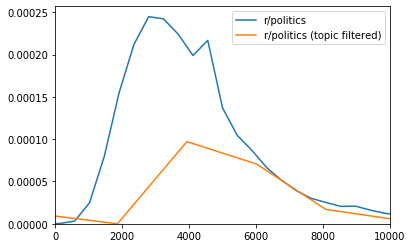

In [23]:
# sns.kdeplot(rs_ppls, label='relationships')
sns.kdeplot(pol_ppls, label='r/politics')
sns.kdeplot(pol_filtered_ppls, label='r/politics (topic filtered)')
plt.xlim(0,10000)
plt.show()

In [81]:
len(pol_filtered_ppls)

10000

In [82]:
len(pol_ppls)

10000

In [89]:
import pandas as pd

In [90]:
d = {'pol_filtered': pol_filtered_ppls, 'pol': pol_ppls}

In [93]:
pd.DataFrame(d).to_csv('ppl_scores.csv')

In [94]:
os.listdir()

['ppl_scores.csv',
 'LICENSE.md',
 'progun_forum_corpus.txt',
 'convokit',
 '.DS_Store',
 'requirements.txt',
 'progun_corpus.txt',
 'skipped_users.json',
 'Makefile',
 'website',
 'datasets',
 'tests',
 'README.md',
 'setup.py',
 '.gitignore',
 'ldavis_prepared_8',
 'moderate_forum_corpus_full.txt',
 'CONTRIBUTING.md',
 'examples',
 'antigun_forum_corpus_full.txt',
 'progun_forum_corpus_full.txt',
 'doc',
 'ldavis_prepared_news_8',
 'antigun_forum_corpus.txt',
 '.git',
 'antigun_corpus.txt',
 'whole_forum_corpus_full.txt',
 '.idea']